In [1]:
import pickle
import seaborn as sns
import pandas as pd


do = 'High-overlap'
layer = 1
debug = False

evaluation_path = {}
evaluations = {}

evaluation_path['remove'] = f'../pickles/evaluations/topk_{do}_L{layer}.pickle'
evaluation_path['neg'] = f'../pickles/evaluations/topk_{do}_L{layer}_neg.pickle'

all_tops =  {}
metrices = {}
classes = {}
scores = {}
df = {}


for mode in list(evaluation_path.keys()):
    
    with open(evaluation_path[mode], 'rb') as handle:   
        evaluations[mode] = pickle.load(handle)
  
    all_tops[mode] =  []
    metrices[mode] = []
    classes[mode] = []
    scores[mode] = []


    for topk in evaluations[mode].keys():
        for cur_class in evaluations[mode][topk].keys():
            for heuristic in evaluations[mode][topk][cur_class].keys():

                all_tops[mode].append(topk)
                classes[mode].append(cur_class)
                metrices[mode].append(heuristic)
                scores[mode].append(evaluations[mode][topk][cur_class][heuristic])      


                
    df[mode] = pd.DataFrame()
    df[mode]['TopK'] = all_tops[mode]
    df[mode]['Classes'] = classes[mode]
    df[mode]['Metrics'] = metrices[mode]
    df[mode]['Scores'] = scores[mode]
    


In [2]:
evaluations[mode].keys()

dict_keys([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2])

In [3]:
df['remove'].head()

,TopK,Classes,Metrics,Scores
0,0.01,entailed,lexical_overlap,0.9926
1,0.01,entailed,subsequence,0.9968
2,0.01,entailed,constituent,0.9884
3,0.01,non-entailed,lexical_overlap,0.1628
4,0.01,non-entailed,subsequence,0.0422


In [4]:
df['neg'].head()

,TopK,Classes,Metrics,Scores
0,0.01,entailed,lexical_overlap,0.9878
1,0.01,entailed,subsequence,0.9950
2,0.01,entailed,constituent,0.9932
3,0.01,non-entailed,lexical_overlap,0.0902
4,0.01,non-entailed,subsequence,0.0316


<AxesSubplot: xlabel='TopK', ylabel='Scores'>

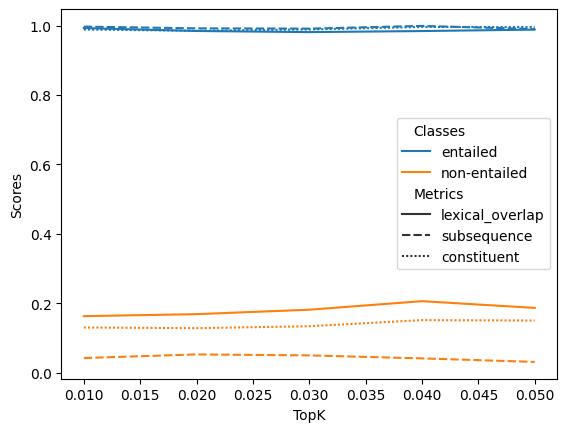

In [6]:
sns.lineplot(data=df['remove'], x="TopK", y="Scores", hue="Classes", style="Metrics")

<AxesSubplot: xlabel='TopK', ylabel='Scores'>

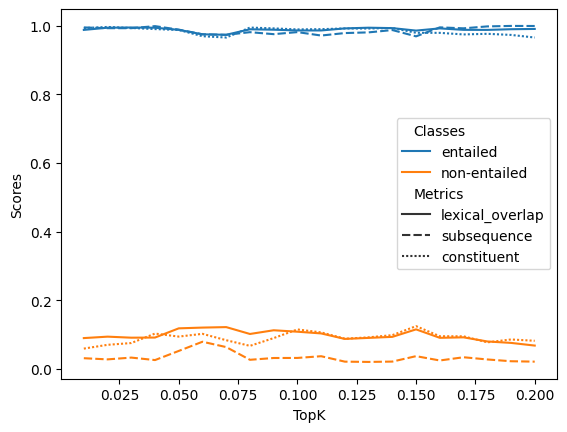

In [5]:
sns.lineplot(data=df['neg'], x="TopK", y="Scores", hue="Classes", style="Metrics")